# Imports

In [ ]:
import scipy as sp
from scipy.linalg import toeplitz
import numpy as np
import math
import matplotlib.pyplot as plt

# Energy Analysis
Equation numbers wrapped in parenthesis refer to Emulated Ensemble.

Equation numbers wrapped in brackets refer to Numerical Sound Synthesis

## Mass Spring system

## Ideal Bar (Euler Bernoulli Beam)

$\delta_{tt}u_l^n = -\kappa^2 \delta_{xxxx}u_l^n - 2\sigma_0 \delta_{t\cdot}u_l^n + 2\sigma_1 \delta_{t-}\delta_{xx}u_l^n$

$\frac{1}{k^2}(u_l^{n+1} - 2u_l^n + u_l^n{-1}) = \frac{\kappa^2}{h^4}(u_{l+2}^n-4u_{l+1}^n + 6u_l^n - 4u_{l-1}^n + u_{l-2}^n) - \frac{2\sigma_0}{2k}(u_l^{n+1} - u_l^{n-1}) + \frac{2\sigma_1}{kh^2}(u_{l+1}^n-2u_l^n+u_{l-1}^n-u_{l+1}^{n-1}+2u_l^{n-1}+u_{l-1}^{n-1})$

$u_l^{n+1} - 2u_l^n + u_l^n{-1} = \frac{\kappa^2k^2}{h^4}(u_{l+2}^n-4u_{l+1}^n + 6u_l^n - 4u_{l-1}^n + u_{l-2}^n) - 2\sigma_0 \frac{k}{2}(u_l^{n+1} - u_l^{n-1}) + \frac{2\sigma_1 k}{h^2}(u_{l+1}^n-2u_l^n+u_{l-1}^n-u_{l+1}^{n-1}+2u_l^{n-1}+u_{l-1}^{n-1})$

$u_l^{n+1} = \frac{\kappa^2k^2}{h^4}(u_{l+2}^n-4u_{l+1}^n + 6u_l^n - 4u_{l-1}^n + u_{l-2}^n) - \sigma_0 k(u_l^{n+1} - u_l^{n-1}) + \frac{2\sigma_1 k}{h^2}(u_{l+1}^n-2u_l^n+u_{l-1}^n-u_{l+1}^{n-1}+2u_l^{n-1}+u_{l-1}^{n-1}) + 2u_l^n - u_l^{n-1}$

$(1+\sigma_0 k)u_l^{n+1} = \mu^2(u_{l+2}^n-4*u_{l+1}^n + 6u_l^n - 4u_l{l-1}^n + u_{l-2}^n) - \sigma_0 k(- u_l^n{-1}) + \frac{2\sigma_1 k}{h^2}(u_{l+1}^n-2u_l^n+u_{l-1}^n-u_{l+1}^{n-1}+2u_l^{n-1}+u_{l-1}^{n-1}) + 2u_l^n - u_l^{n-1}$

collecting terms

$(1+\sigma_0 k)u_l^{n+1} = \Big(2 - 6\mu^2 - \frac{4\sigma_1 k}{h^2} \Big) u_l^n + \Big( 4\mu^2 + \frac{2\sigma k}{h^2} \Big) (u_{l+1}^n + u_{l-1}^n) - \mu^2(u_{l+2}^n + u_{l-2}^n) + \Big(-1 + \sigma_0 k + \frac{4\sigma_1 k}{h^2} \Big) u_l^{n-1} - \frac{2\sigma_1 k}{h^2} (u_{l+1}^{n-1} + u_{l-1}^{n-1})$

with

$\kappa = \sqrt{\frac{EI}{\rho A}} \quad$ and $\quad \mu = \frac{\kappa k}{h^2}$ 

### Von Neumann Analysis

Using the definitions for spatial and temporal operators found in (eq. 3.23 and 3.22) we can obtain a frequency domain representation of the scheme

$ \frac{1}{k^2}(z-2+z^{-1}) = - \frac{16\kappa^2}{h^4}sin^4(\beta h / 2) - \frac{2\sigma_0}{2k}(z-z^{-1}) + 2\frac{\sigma_1}{k}(1-z^{-1}) (-\frac{4}{h^2}sin^2(\beta h/2)) $

$ \frac{1}{k^2}(z-2+z^{-1}) = - \frac{16\kappa^2}{h^4}sin^4(\beta h / 2) - \frac{\sigma_0}{k}z + \frac{\sigma_0}{k}z^{-1} - \frac{8\sigma_1}{kh^2}sin^2(\beta h/2) + \frac{8\sigma_1}{kh^2}sin^2(\beta h /2)z^{-1} $

Rewrite equation

$ 0 = \frac{1}{k^2}(z-2+z^{-1}) + \frac{16\kappa^2}{h^4}sin^4(\beta h / 2) + \frac{\sigma_0}{k}z - \frac{\sigma_0}{k}z^{-1} + \frac{8\sigma_1}{kh^2}sin^2(\beta h/2) - \frac{8\sigma_1}{kh^2}sin^2(\beta h /2)z^{-1}$

Multiply all terms by $k^2$

$ 0 = z-2+z^{-1} + \frac{16\kappa^2k^2}{h^4}sin^4(\beta h / 2) + (\sigma_0 k)z - (\sigma_0 k)z^{-1} + \frac{8\sigma_1 k}{h^2}sin^2(\beta h/2) - \frac{8\sigma_1 k}{h^2}sin^2(\beta h /2)z^{-1}$

Collect terms to form characteristic equation

$ 0 = (1 + \sigma_0 k)z + (\frac{16\kappa^2k^2}{h^4}sin^4(\beta h / 2) + \frac{8\sigma_1 k}{h^2}sin^2(\beta h/2) - 2) + (1 - \sigma_0 k - \frac{8\sigma_1 k}{h^2}sin^2(\beta h/2))z^{-1}$

Divide by the term containing $\sigma_0$ and multiply by $z$ to get the equation as a second-order polynomial.
Using $\mathcal{S}=sin^2(\beta h/2)$ for brevity.

$ 0 = z^2 + \Big( \frac{\frac{16\kappa^2k^2}{h^4}\mathcal{S}^2 + \frac{8\sigma_1 k}{h^2}\mathcal{S} - 2}{1+\sigma_0k} \Big)z + \frac{1 - \sigma_0 k - \frac{8\sigma_1 k}{h^2}\mathcal{S}}{1+\sigma_0k} $

Substituting the coefficients into (eq. 3.26) lets us determine the stability condition.

$ \Big| \Big( \frac{\frac{16\kappa^2k^2}{h^4}\mathcal{S}^2 + \frac{8\sigma_1 k}{h^2}\mathcal{S} - 2}{1+\sigma_0k} \Big) \Big| - 1 \leq \frac{1 - \sigma_0 k - \frac{8\sigma_1 k}{h^2}\mathcal{S}}{1+\sigma_0k} \leq 1$

Multiplying by $(1+\sigma_0k)$

$ \Big| \frac{16\kappa^2k^2}{h^4}\mathcal{S}^2 + \frac{8\sigma_1 k}{h^2}\mathcal{S} - 2 \Big| - 1+\sigma_0k \leq 1 - \sigma_0 k - \frac{8\sigma_1 k}{h^2}\mathcal{S} \leq 1+\sigma_0k$

Adding $1+\sigma_0k$

$ \Big| \frac{16\kappa^2k^2}{h^4}\mathcal{S}^2 + \frac{8\sigma_1 k}{h^2}\mathcal{S} - 2  \Big| \leq 2 - \frac{8\sigma_1 k}{h^2}\mathcal{S} \leq 2+ 2\sigma_0k$

The second condition will always hold as $\sigma_0, \sigma_1 \geq 0$. We can then rewrite the previous equation as

$ 2 - \frac{8\sigma_1 k}{h^2}\mathcal{S} \leq \frac{16\kappa^2k^2}{h^4}\mathcal{S}^2 + \frac{8\sigma_1 k}{h^2}\mathcal{S} - 2 \leq 2 - \frac{8\sigma_1 k}{h^2}\mathcal{S} $

Adding $ 2 - \frac{8\sigma_1 k}{h^2}\mathcal{S} $

$ 0 \leq \frac{16\kappa^2k^2}{h^4}\mathcal{S}^2 \leq 4 - \frac{16\sigma_1 k}{h^2}\mathcal{S}$

$\frac{16\kappa^2k^2}{h^4}\mathcal{S}^2$ is non negative, so the first condition is satisfied.

Adding $\frac{16\sigma_1 k}{h^2}\mathcal{S}$

$ \frac{16\kappa^2k^2}{h^4}\mathcal{S}^2 + \frac{16\sigma_1 k}{h^2}\mathcal{S} \leq 4 $

Dividing by 4

$ \frac{4\kappa^2k^2}{h^4}\mathcal{S}^2 + \frac{4\sigma_1 k}{h^2}\mathcal{S} \leq 1 $

As the previous equation takes its maximum value when $\mathcal{S} = 1$ it can be rewritten as

$ \frac{4\kappa^2k^2}{h^4} + \frac{4\sigma_1 k}{h^2} \leq 1 $

Multiply by $h^4$

$ 4\kappa^2k^2 + 4\sigma_1 k h^2 \leq h^4 $

Add left side to right to form quadratic equation in $h^2$

$ h^4 + 4\sigma_1 k h^2 4\kappa^2k^2 \geq 0 $

Then using the quadratic formula $h$ can be shown to be bound by

$ h \geq \sqrt{\frac{-4\sigma_1 k + \sqrt{(-4\sigma_1 k)^2  16\kappa^2k^2}}{2}}$

### Energy Analysis
Ideal bar (damped) equation with physical parameters written out (by dividing with $\rho A$ on both sides)       
$\rho A \delta_{tt}u_l^n = -EI\delta_{xxxx}u_l^n - 2\sigma_0 \rho A \delta_{t\cdot}u_l^n + 2\sigma_1 \rho A \delta_{t-}\delta_{xx}u_l^n$     

**Step 1: Obtain** $\delta_{t+} \mathfrak{h}$

Moving the right side of the previous equation to the left.

$\rho A \delta_{tt}u_l^n + EI\delta_{xxxx}u_l^n + 2\sigma_0 \rho A \delta_{t\cdot}u_l^n - 2\sigma_1 \rho A \delta_{t-}\delta_{xx}u_l^n= 0$

Then take the inner product of the equation with $\delta_{t\cdot}u_l^n$ over the discrete domain $d$ to get $\delta_{t+} {\mathfrak{h}}$

$\delta_{t+} \mathfrak{h} = \rho A \langle \delta_{t\cdot}u_l^n, \delta_{tt}u_l^n \rangle _d + EI \langle \delta_{t\cdot}u_l^n, \delta_{xxxx}u_l^n \rangle _d + 2\sigma_0 \rho A \langle \delta_{t\cdot}u_l^n, \delta_{t\cdot}u_l^n \rangle _d - 2\sigma_1 \rho A \langle \delta_{t\cdot}u_l^n, \delta_{t-}\delta_{xx}u_l^n \rangle _d= 0$

**Step 2: Identify energy types and isolate** $\delta_{t+}$

The system is distributed and has damping meaning that the energy balance will have the form:

$\delta_{t+} \mathfrak{h} = \mathfrak{b} - \mathfrak{q}$

With $\mathfrak{b}$ denoting the boundary term and $\mathfrak{q}$ denoting the damping. The damping relates to the terms with sigma, where the first term can be rewritten by its norm (Eq. 3.7) which results in:

$\mathfrak{q} = 2\sigma_0 \rho A \| \delta_{t\cdot}u_l^n\|_d^2 - 2 \sigma_1 \rho A \langle \delta_{t\cdot}u_l^n, \delta_{t-}\delta_{xx}u_l^n \rangle _d$

From here we can then find the boundaries by using summation by parts (eq. 3.16b) on the term $EI \langle \delta_{t\cdot}u_l^n, \delta_{xxxx}u_l^n \rangle _d$
to get the following

$\delta_{t+} \mathfrak{h} = \rho A \langle \delta_{t\cdot}u_l^n, \delta_{tt}u_l^n \rangle _d + EI \langle \delta_{t\cdot}\delta_{xx}u_l^n, \delta_{xx}u_l^n \rangle _{\overline{\underline{d}}} = \mathfrak{b} -\mathfrak{q}$

where

$\mathfrak{b} = E I ( (\delta_{t\cdot}u_N^n)(\delta_{x+}\delta_{xx}u_N^n)-(\delta_{xx}u_N^n)(\delta_{x-}\delta_{t\cdot}u_N^n)-(\delta_{t\cdot}u_0^n)(\delta_{x-}\delta_{xx}u_0^n)-(\delta_{xx}u_0^n)(\delta_{x+}\delta_{t\cdot}u_0^n))$

Bondaries can be shown to equal 0, as such the term can be removed. Following this we can use (eq. 3.17a) on the first term and (3.17b) on the second term

$\delta_{t+} \mathfrak{h} = \delta_{t+} ( \frac{\rho A}{2} \| \delta_{t-} u_l^n \|_d^2 + \frac{EI}{2} \langle \delta_{xx}u_l^n, e_{t-} \delta_{xx}u_l^n \rangle _{\overline{\underline{d}}}) = - \mathfrak{q}$

which lets us isolate $\mathfrak{h}$ by removing $\delta_{t+}$

$\mathfrak{h} =  \frac{\rho A}{2} \| \delta_{t-} u_l^n \|_d^2 + \frac{EI}{2} \langle \delta_{xx}u_l^n, e_{t-} \delta_{xx}u_l^n \rangle _{\overline{\underline{d}}} = \mathfrak{t} + \mathfrak{v}$

where

$\mathfrak{t} = \frac{\rho A}{2} \| \delta_{t-} u_l^n \|_d^2$

and

$\mathfrak{v} = \frac{EI}{2} \langle \delta_{xx}u_l^n, e_{t-} \delta_{xx}u_l^n \rangle _{\overline{\underline{d}}}$

**Step 3: Check units**

Is same as stiff string analysis in emulated ensemble

**Step 4: Implementation**

Matrix form implementation has the equation of 

$ \bold{u}^{n+1} = \frac{1}{A}(\bold{Bu}^n + \bold{Cu}^{n-1})$

where

$ A = (1 + \sigma_0 k) \qquad  \bold{B} = 2 \bold{I} - \kappa^2 k^2 \bold{D}_{xxxx} + 2\sigma_1 k \bold{D}_{xx} \qquad  C = -(1-\sigma_0 k)\bold{I}-2\sigma_1 k \bold{D}_{xx}$

Bold lower case indicates a vector and bold uppercase indicates matrix.


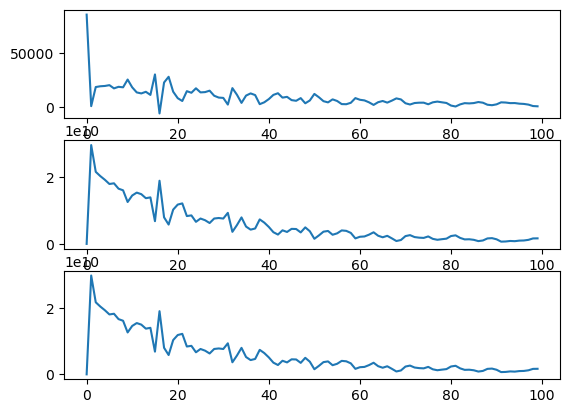

In [86]:
fs = 48000 #sample rate
k = 1/fs #sampling Period

lenSound = 100 #length of sound in samples

L = 0.1564
rho = 7850 #material Density
r = 0.001905 / 2
A = math.pi * r**2 #cross-sectinal area
E = 2*10**11 #young's Modulus
I = math.pi * r**4 / 4 #inertia

kappa = math.sqrt((E*I)/(rho*A)) #stiffness coefficient

sigma_1 = 0.05 #freq. dependent damping
sigma_0 = 1.0 #freq. independent damping

h = math.sqrt((4*sigma_1*k+math.sqrt((4*sigma_1*k)**2+16*kappa**2*k**2))/2)  #grid spacing based on stability condition

N = int(L//h) #grid intervals

h = L/N 
hSq = h**2

mu = (kappa*k) / hSq
muSq = mu**2

Dxx = 1/h**2 * np.matrix(toeplitz(np.pad([-2, 1], (0, N+1-2))))

Dxxxx = Dxx * Dxx

Id = np.matrix(np.identity(N + 1))

A = 1 + sigma_0 * k

B = 2* Id - kappa**2 * k**2 * Dxxxx + 2*sigma_1*k*Dxx

C = -(1-sigma_0*k) * Id - 2 * sigma_1 * k * Dxx

uNext = np.matrix(np.zeros(N+1))
u = np.matrix(np.zeros(N+1))

loc = round(0.5 * N); # Center location
halfWidth = round(N/10); # Half-width of raised cosine
width = 2 * halfWidth; # Full width
rcX = range(0,width); # x-locations for raised cosine
rc = np.array([[0.5 - 0.5 * math.cos(2 * math.pi * x / width) for x in rcX]]) # raised cosine
u[0,loc-halfWidth : loc+halfWidth] = rc[:] # initialise current state

u = u.T
uNext = uNext.T
uPrev = np.matrix.copy(u)

output = np.zeros(lenSound) #output vector

potEnergy = np.zeros(lenSound)
kinEnergy = np.zeros(lenSound)

for i in range(0, lenSound):
    
    uNext = 1/A * (B * u + C * uPrev)
    
    output[i] = u[int(N/2), 0]
    
    
    kinEnergy[i] = rho * A * h / 2 * np.sum(np.array(1/k * (u - uPrev))**2) # Do these change depending on boundary condition
    potEnergy[i] = E * I * h / 2 * np.sum(np.array(Dxx * u) * np.array(Dxx * uPrev)) 
    
    uPrev = np.matrix.copy(u)
    u = np.matrix.copy(uNext)


fig, (ax0, ax1, ax2) = plt.subplots(3)
ax0.plot(potEnergy)
ax1.plot(kinEnergy)
ax2.plot(potEnergy + kinEnergy)
plt.show()

**Stability condition using energy analysis** Unsure how to solve this..

Energy must be non-negative for the scheme to be stable.
$\mathfrak{t}$ is always positive due to being squared, so stability depends on $\mathfrak{v}$

We start by rewriting the equation as a sum of the product of the two functions (eq. 3.8)

$\mathfrak{v} =   \frac{EI}{2} \displaystyle\sum_{l=1}^{N-1} h(\delta_{xx}u_l^n)(e_{t-} \delta_{xx}u_l^n) $

Using (eq. 3.17f) this can be rewritten as

$\mathfrak{v} =   \frac{EI}{2} \displaystyle\sum_{l=1}^{N-1} h\Big((\mu_{t-}\delta_{xx}u_l^n)^2 - \frac{k^2}{4}(\delta_{t-} \delta_{xx}u_l^n)^2\Big) $

We can then go back to an innner product using (eq. 3.8) again and from there to a norm using (eq. 3.7) to get

$\mathfrak{v} = \frac{EI}{2} \Big( \| \mu_{t-}\delta_{xx}u_l^n \|_{\overline{\underline{d}}}^2 - \frac{k^2}{4} \| \delta_{t-} \delta_{xx}u_l^n\|_{\overline{\underline{d}}}^2   \Big)$

using [eq. 5.31] we can put a condition on $\mathfrak{v}$

$\mathfrak{v} \geq \frac{EI}{2} \Big( \| \mu_{t-}\delta_{xx}u_l^n \|_{\overline{\underline{d}}}^2 - \frac{k^2}{4} \big( \frac{4}{h^2} \| \delta_{t-}u_l^n\|_d \big)^2 \Big)$

## Timoshenko Beam

A two variable system calculating both displacement $u$ and rotation $\Psi$

$ \delta_{tt}u_l^n = - \frac{GK}{\rho}(\delta_{x\cdot}\Psi_l^n - \delta_{xx}u_l^n) - 2\sigma_0 \delta_{t\cdot}u_l^n + 2\sigma_1 \delta_{t-}\delta_{xx}u_l^n$ $

$ \delta_{tt}\Psi_l^n = \frac{E}{\rho}\delta_{xx}\Psi_l^n+\frac{GAK}{\rho I}(\delta_{x\cdot}u_l^n-\Psi_l^n)$

### Von Neumann Analysis

Frequency domain representation of the scheme

With $ \gamma = \frac{GK}{\rho} $ and $\epsilon = \frac{I}{A}$

$ \frac{1}{k^2}(z-2+z^{-1}) = -\gamma \Big(\frac{j}{h} sin(\beta h) + \frac{4}{h^2}sin^2(\beta h/2) \Big) - \frac{2\sigma_0}{2k}(z-z^{-1}) + 2\frac{\sigma_1}{k}(1-z^{-1}) (-\frac{4}{h^2}sin^2(\beta h/2)) $

$ \frac{1}{k^2}(z-2+z^{-1}) = - \frac{\gamma j}{h} sin(\beta h) - \frac{4\gamma}{h^2}sin^2(\beta h/2) - \frac{\sigma_0}{k}z + \frac{\sigma_0}{k}z^{-1} - \frac{8\sigma_1}{kh^2}sin^2(\beta h/2) + \frac{8\sigma_1}{kh^2}sin^2(\beta h /2)z^{-1} $

Rewrite equations

$ 0 = \frac{1}{k^2}(z-2+z^{-1}) + \frac{\gamma j}{h} sin(\beta h) + \frac{4\gamma}{h^2}sin^2(\beta h/2) + \frac{\sigma_0}{k}z - \frac{\sigma_0}{k}z^{-1} + \frac{8\sigma_1}{kh^2}sin^2(\beta h/2) - \frac{8\sigma_1}{kh^2}sin^2(\beta h /2)z^{-1} $

Multiply all terms by $k^2$

$ 0 = z-2+z^{-1} + \frac{\gamma j k^2}{h} sin(\beta h) + \frac{4\gamma k^2}{h^2}sin^2(\beta h/2) + (\sigma_0 k)z - (\sigma_0 k)z^{-1} + \frac{8\sigma_1 k}{h^2}sin^2(\beta h/2) - \frac{8\sigma_1 k}{h^2}sin^2(\beta h /2)z^{-1}$

Collect terms to form characteristic equation

$ 0 = z(1 + \sigma_0 k) + \Big( \frac{\gamma j k^2}{h} sin(\beta h) + \frac{4\gamma k^2}{h^2}sin^2(\beta h/2) + \frac{8\sigma_1 k}{h^2}sin^2(\beta h/2) - 2 \Big) + z^{-1} \Big(1 - \sigma_0 k - \frac{8\sigma_1 k}{h^2}sin^2(\beta h /2)\Big) $

Following same methodology for the rotation equation

$ \frac{1}{k^2}(z-2+z^{-1}) = - \frac{E4}{\rho h^2} sin^2(\beta h/2) + \frac{\gamma}{\epsilon}(\frac{j}{h}sin(\beta h) - 1)$

Rewrite equations

$ 0 = \frac{1}{k^2}(z-2+z^{-1}) + \frac{E4}{\rho h^2} sin^2(\beta h/2) - \frac{\gamma}{\epsilon} (\frac{j}{h}sin(\beta h) - 1)$

Multiply all terms by $k^2$

$ 0 = (z-2+z^{-1}) + \frac{\epsilon E4k^2}{\rho h^2} sin^2(\beta h/2) - \frac{\gamma k^2}{\epsilon}(\frac{j}{h}sin(\beta h) - 1)$

Collect terms to form characteristic equation

$ 0 = z + \Big(\frac{E4k^2}{\rho h^2} sin^2(\beta h/2) - \frac{\gamma k^2}{\epsilon}(\frac{j}{h}sin(\beta h) - 1) - 2 \Big) + z^{-1} $

Now what....

In [2]:
import math

f = 440

r = 1.524 * 10 **-3
rho = 7850 #material Density
E = 2*10**11 #young's Modulus

kappa = math.sqrt(E/rho)

K = r/2

L= math.sqrt(((1.426*math.pi*K*kappa)/f)/8)
L

0.06996501599678723